# Project 5: Transfer Learning and Feature Extraction
---

## Assignments

Please, edit your report by fulfilling the following list of assignments.

**Introduction.** Short summary of the goals of the  project. The sections composing the report.

**Section 1. Data loading and preparation**

* 1a. Download and preprocess a sample image;
* 2a. Show the sample image.

**Section 2. The VGG16 model** 
* 1a. Download the net, pre-trained.

**Section 3. Extracting features**
* 3a. Visualize the learned kernels of the first convolutional layer;
* 3b. Visualize the feature maps of the feature extraction block.

**Results, observations and conclusions**

**Full code**



## Introduction

## 1. Data loading and preparation

In [1]:
import urllib.request

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
from torchvision import transforms

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

### 1a. Download and preprocess a sample image

In [3]:
# Download an example image from the pytorch website
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

Open the image and apply a transform ([documentation](https://pytorch.org/vision/stable/transforms.html)):
* `Resize` it to 256x256 pixels;
* `CenterCrop` it to size 224;
* transform it `ToTensor`;
* `Normalize` it with `mean=[0.485, 0.456, 0.406]` and `std=[0.229, 0.224, 0.225]`. 

In [4]:
input_image = Image.open(filename)

transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# apply the transform
image = transform(input_image)
# create a mini-batch as expected by the model
image = image.unsqueeze(0) 

### 2a. Show the sample image

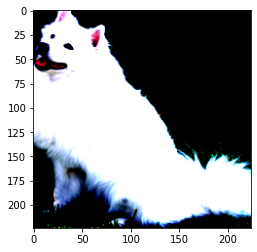

In [5]:
image_show = image.squeeze()
image_show = image_show.permute(1,2,0)
image_show = np.clip(image_show, 0., 1.)
plt.imshow(image_show)
plt.show()

## 2. The VGG16 model

### 2a. Download the net, pre-trained 

Download the VGG16 network ([documentation](https://pytorch.org/hub/pytorch_vision_vgg/)), pre-trained.

In [6]:
model = torch.hub.load('pytorch/vision:v0.9.0', 'vgg16', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/archive/v0.9.0.zip" to /root/.cache/torch/hub/v0.9.0.zip
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

## 3. Extracting features

### 3a. Visualize the learned kernels of the first convolutional layer 

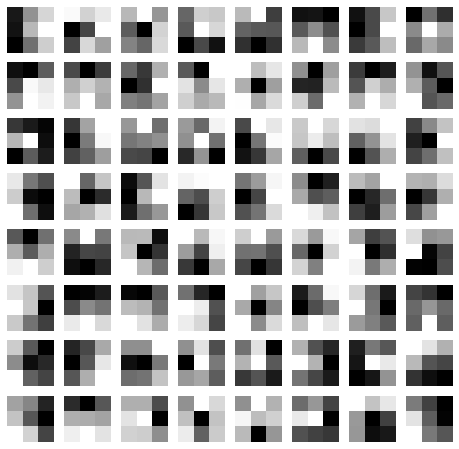

In [7]:
model_children = list(model.children())

first_conv_layer_filters = model_children[0][0].weight

# visualize the first convolutional layer kernels
plt.figure(figsize=(8, 8)) #set the width and height of the figure
for i, filter in enumerate(first_conv_layer_filters): #loop over the kernels in the first conv layer
    # plot a filter
    plt.subplot(8, 8, i+1) 
    plt.imshow(filter[0, :, :].detach().cpu(), cmap='gray')
    plt.axis('off')
plt.show()

### 3b. Visualize the feature maps

#### Slice the network at the 1st and 3rd convolutional layer

By accessing the `features` block of the network, we can "slice" it at a specific layer. Slice the network at the first and third convolutional layer, and add them to a list.

In [8]:
image.to(device)

outputs = []
outputs.extend([
    model.features[:1](image),  #  1st conv layer
    model.features[:6](image),  #  3rd conv layer
])

#### Visualize 16 feature maps from each convolutional layer

Visualize 16 feature maps from the first and the third convolutional layer. Note that each of the layers has more than 16 feature maps, but we want to show only 16 to visualize them better.

Convolutional Layer 1
Size: torch.Size([64, 224, 224])


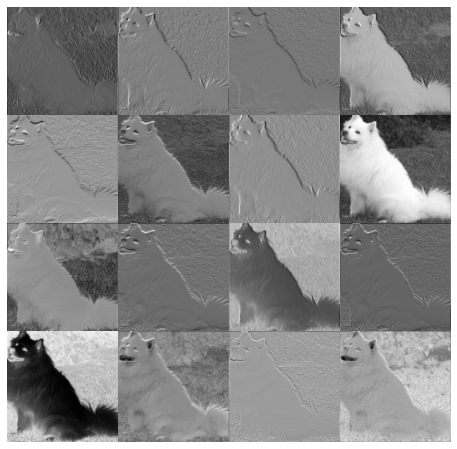

Convolutional Layer 3
Size: torch.Size([128, 112, 112])


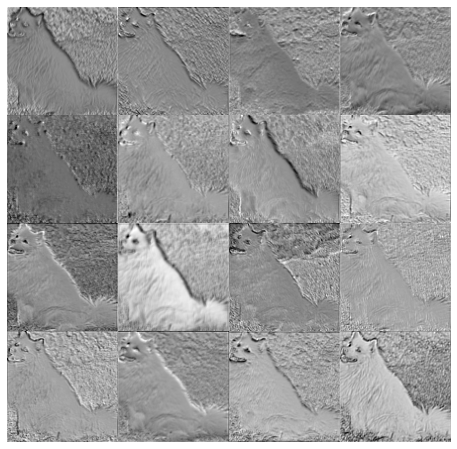

In [9]:
conv_layers_number = [1, 3]

for layer in range(len(outputs)):
    # print(layer)
    plt.figure(figsize=(8, 8))
    # get all the feature maps (filters) of the corresponding layer
    feature_maps = outputs[layer][0, :, :, :]
    feature_maps = feature_maps.data
    print("Convolutional Layer {}\nSize: {}".format(conv_layers_number[layer],
                                                    feature_maps.size()))
    # iterate through the filters in each layer_viz
    for i, filter in enumerate(feature_maps):
        if i == 16: # visualize only 4x4 blocks from each layer
            break
        plt.subplot(4, 4, i + 1)
        plt.imshow(filter, cmap='gray')
        plt.axis("off")
    # tile the images (e.g. no white space between them)
    plt.subplots_adjust(hspace=-.02, wspace=-.02)
    plt.show()

## Results, observations and conclusions

## Full code

---

## Bibliography
* [VGG-NETS](https://pytorch.org/hub/pytorch_vision_vgg/)
* [Visualizing Filters and Feature Maps in Convolutional Neural Networks using PyTorch](https://debuggercafe.com/visualizing-filters-and-feature-maps-in-convolutional-neural-networks-using-pytorch/)